In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection and Loading

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv')
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

This dataset contains 7752 rows and 25 columns. Out of 25 columns Next_tmax and Next_tmin are our output variable asd as we can see continuous values in both columns this is a regression problem.

In [3]:
# Checking for null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

There is presence of null values in all the columns except lat, lon, DEM,   Slope, Solar radiation.

In [4]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

All the columns except date have float dtype.

In [6]:
# Let's check number of unique values in our dataset
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

## Data Preprocessing

In [8]:
# Changing Date's Datatype to datetime format
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [9]:
# Extracting useful features from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [10]:
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...      lat  \
0         28.074101         23.006936  6.818887   69.451805  ...  37.6046   
1         29.850689         24.035009  5.691890   51.937448  ...  37.6046   
2         30.091292         24.565633  6.138224   20.573050  ...  37.5776   
3         29.704629         23.326177  5.650050   65.727144  ...  37.6450   
4         29.113934         23.486480  5.735004  107.965535  ...  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin    Year  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2  2013.0   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5  2013.0   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9  2013.0   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3  2013.0   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5  2013.0   

   Month   Day  
0    6.0  30.0  
1    6.0  30.0  
2    6.0  30.0  
3    6.0  30.0  
4    6.0  30.0  

[5 rows x 28 columns]

In [11]:
# Dropping date feature as we have already extracted useful features from the date
df.drop('Date',axis=1,inplace=True)

In [12]:
df.shape

(7752, 27)

In [13]:
# Dropping rows with null values
df=df.dropna()

In [14]:
df.shape

(7588, 27)

## Summary Statistics

In [15]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...          lat         lon          DEM        Slope  \
count  7588.000000  ...  7588.000000  7588.00000  7588.000000  7588.000000   
mean      0.368510  ...    37.544792   126.99142    61.918136     1.259755   
std       0.262260  ...     0.050428     0.07922    54.323529     1.372748   
min       0.000000  ...    37.456200   126.82600    12.370000     0.098500   
25%       0.146546  ...    37.510200   126.93700    28.700000     0.271300   
50%       0.315706  ...    37.550700   126.99500    45.716000     0.618000   
75%       0.574174  ...    37.577600   127.04200    59.832400     1.767800   
max       0.967277  ...    37.645000   127.13500   212.335000     5.178200   

       Solar radiation    Next_Tmax    Next_Tmin         Year        Month  \
count      7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean       5343.724208    30.241526    22.910820  2014.991697     7.068134   
std         429.782561     3.111807     2.482256     1.410877     2.242389   
min        4329.520508    17.400000    11.300000  2013.000000     1.000000   
25%        5001.485717    28.200000    21.300000  2014.000000     7.000000   
50%        5441.987305    30.400000    23.100000  2015.000000     7.000000   
75%        5729.485840    32.600000    24.600000  2016.000000     8.000000   
max        5992.895996    38.900000    29.800000  2017.000000    12.000000   

               Day  
count  7588.000000  
mean     16.337375  
std       8.216880  
min       7.000000  
25%       8.000000  
50%      16.000000  
75%      24.000000  
max      31.000000  

[8 rows x 27 columns]

## Data Visualization

### Univariate Analysis

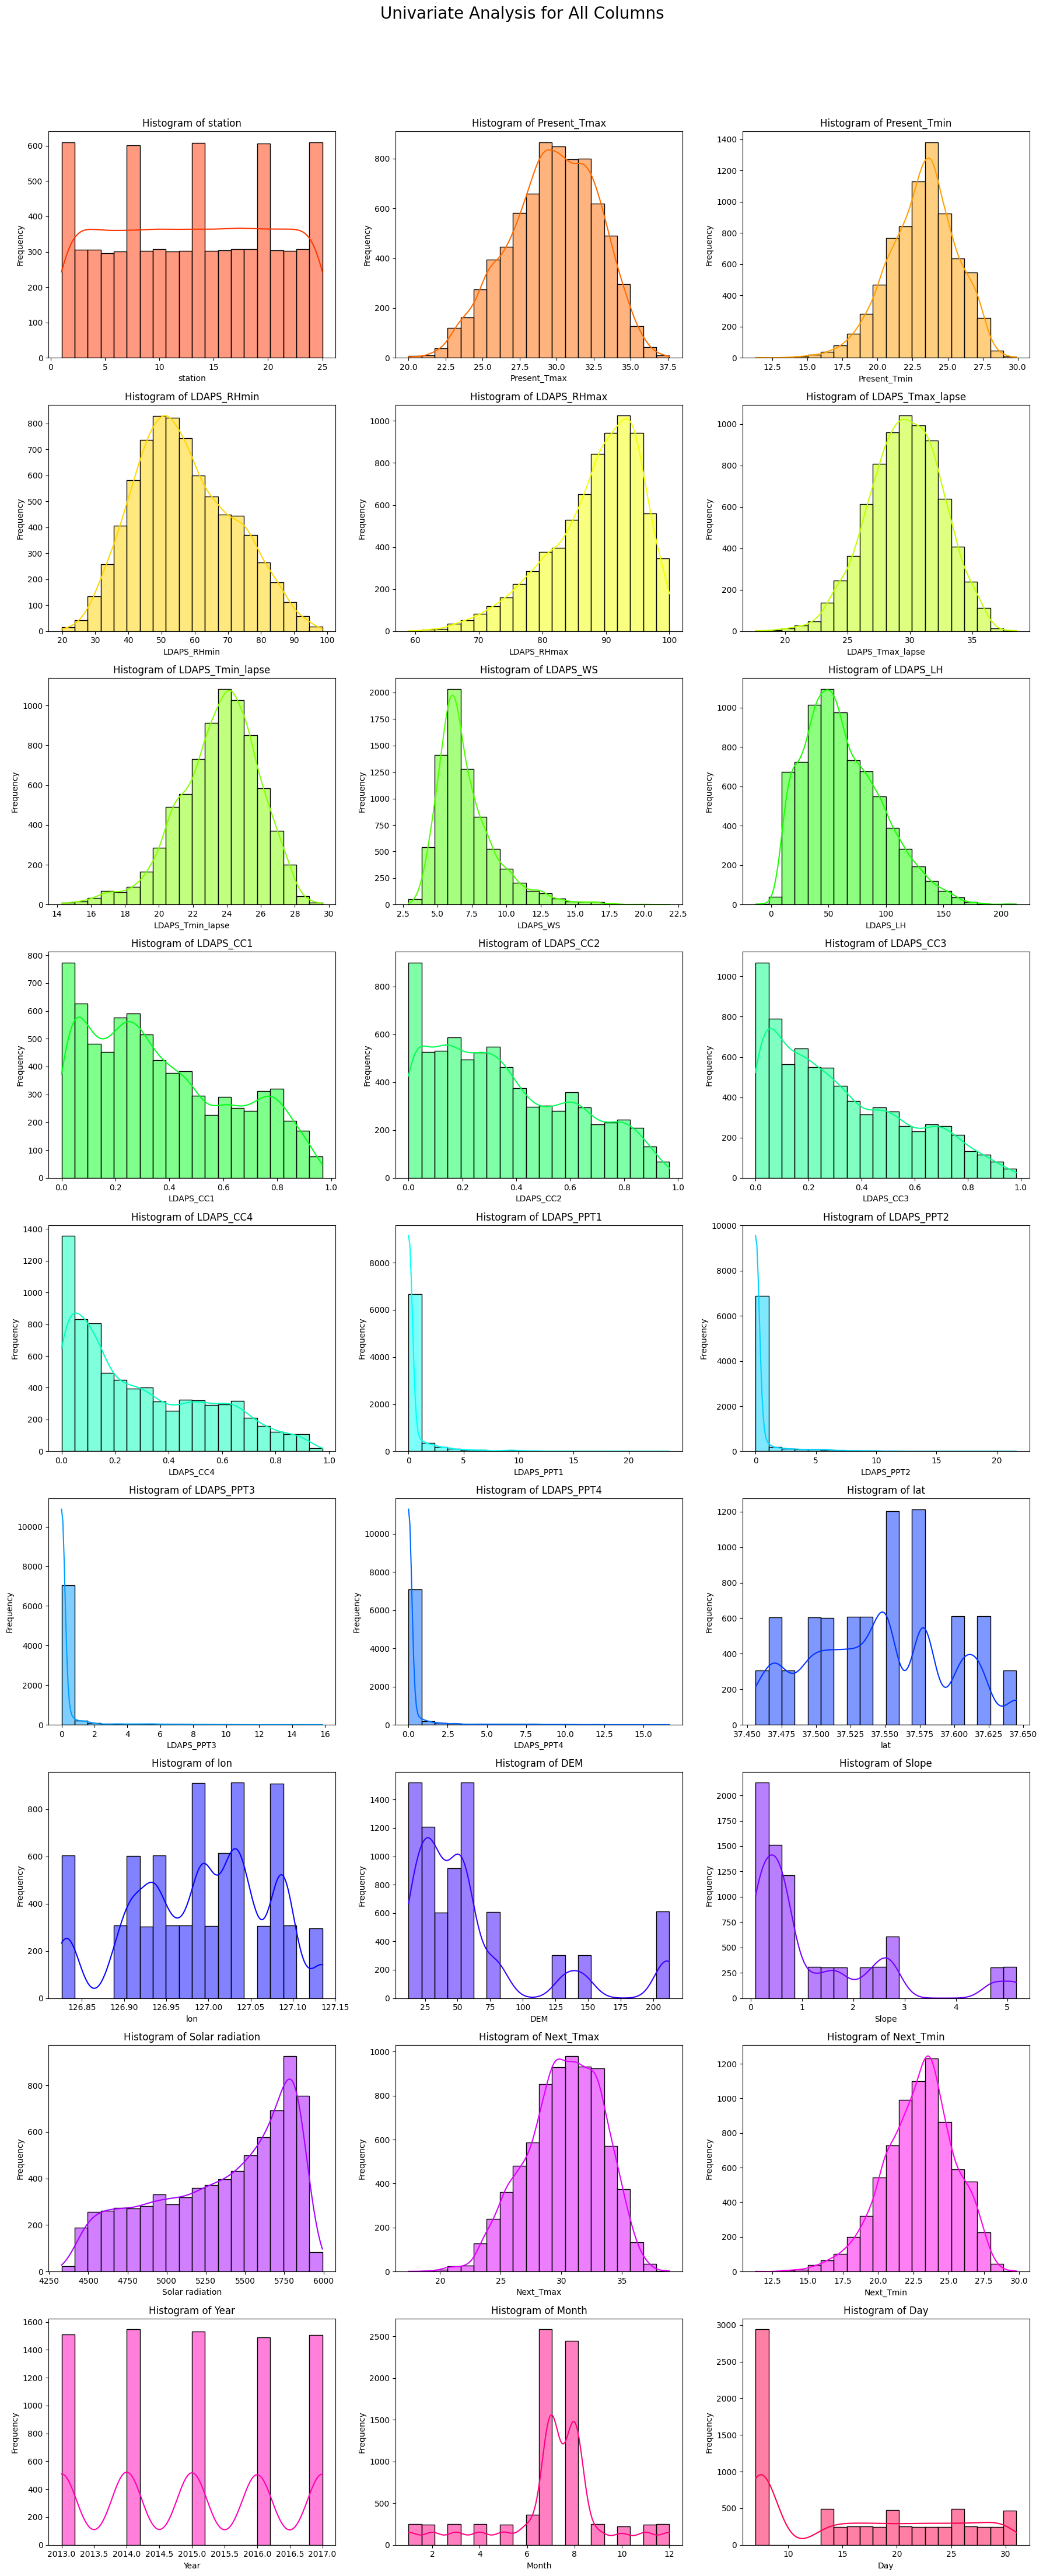

In [17]:
# Number of columns
num_cols = len(df.columns)

# Calculating the number of rows needed for the subplots
num_rows = (num_cols + 2) // 3

# Creating subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows * 5))
fig.suptitle('Univariate Analysis for All Columns', size=20)

# Flattening the axes array for easy iteration
axes = axes.flatten()
colors = sns.color_palette("hsv", num_cols)

# Looping through each column and creating a histogram
for idx, col in enumerate(df.columns):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[idx], color=colors[idx])
    axes[idx].set_title(f'Histogram of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Removing any empty subplots
for idx in range(num_cols, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Bivariate Analysis wrt Next_Tmax

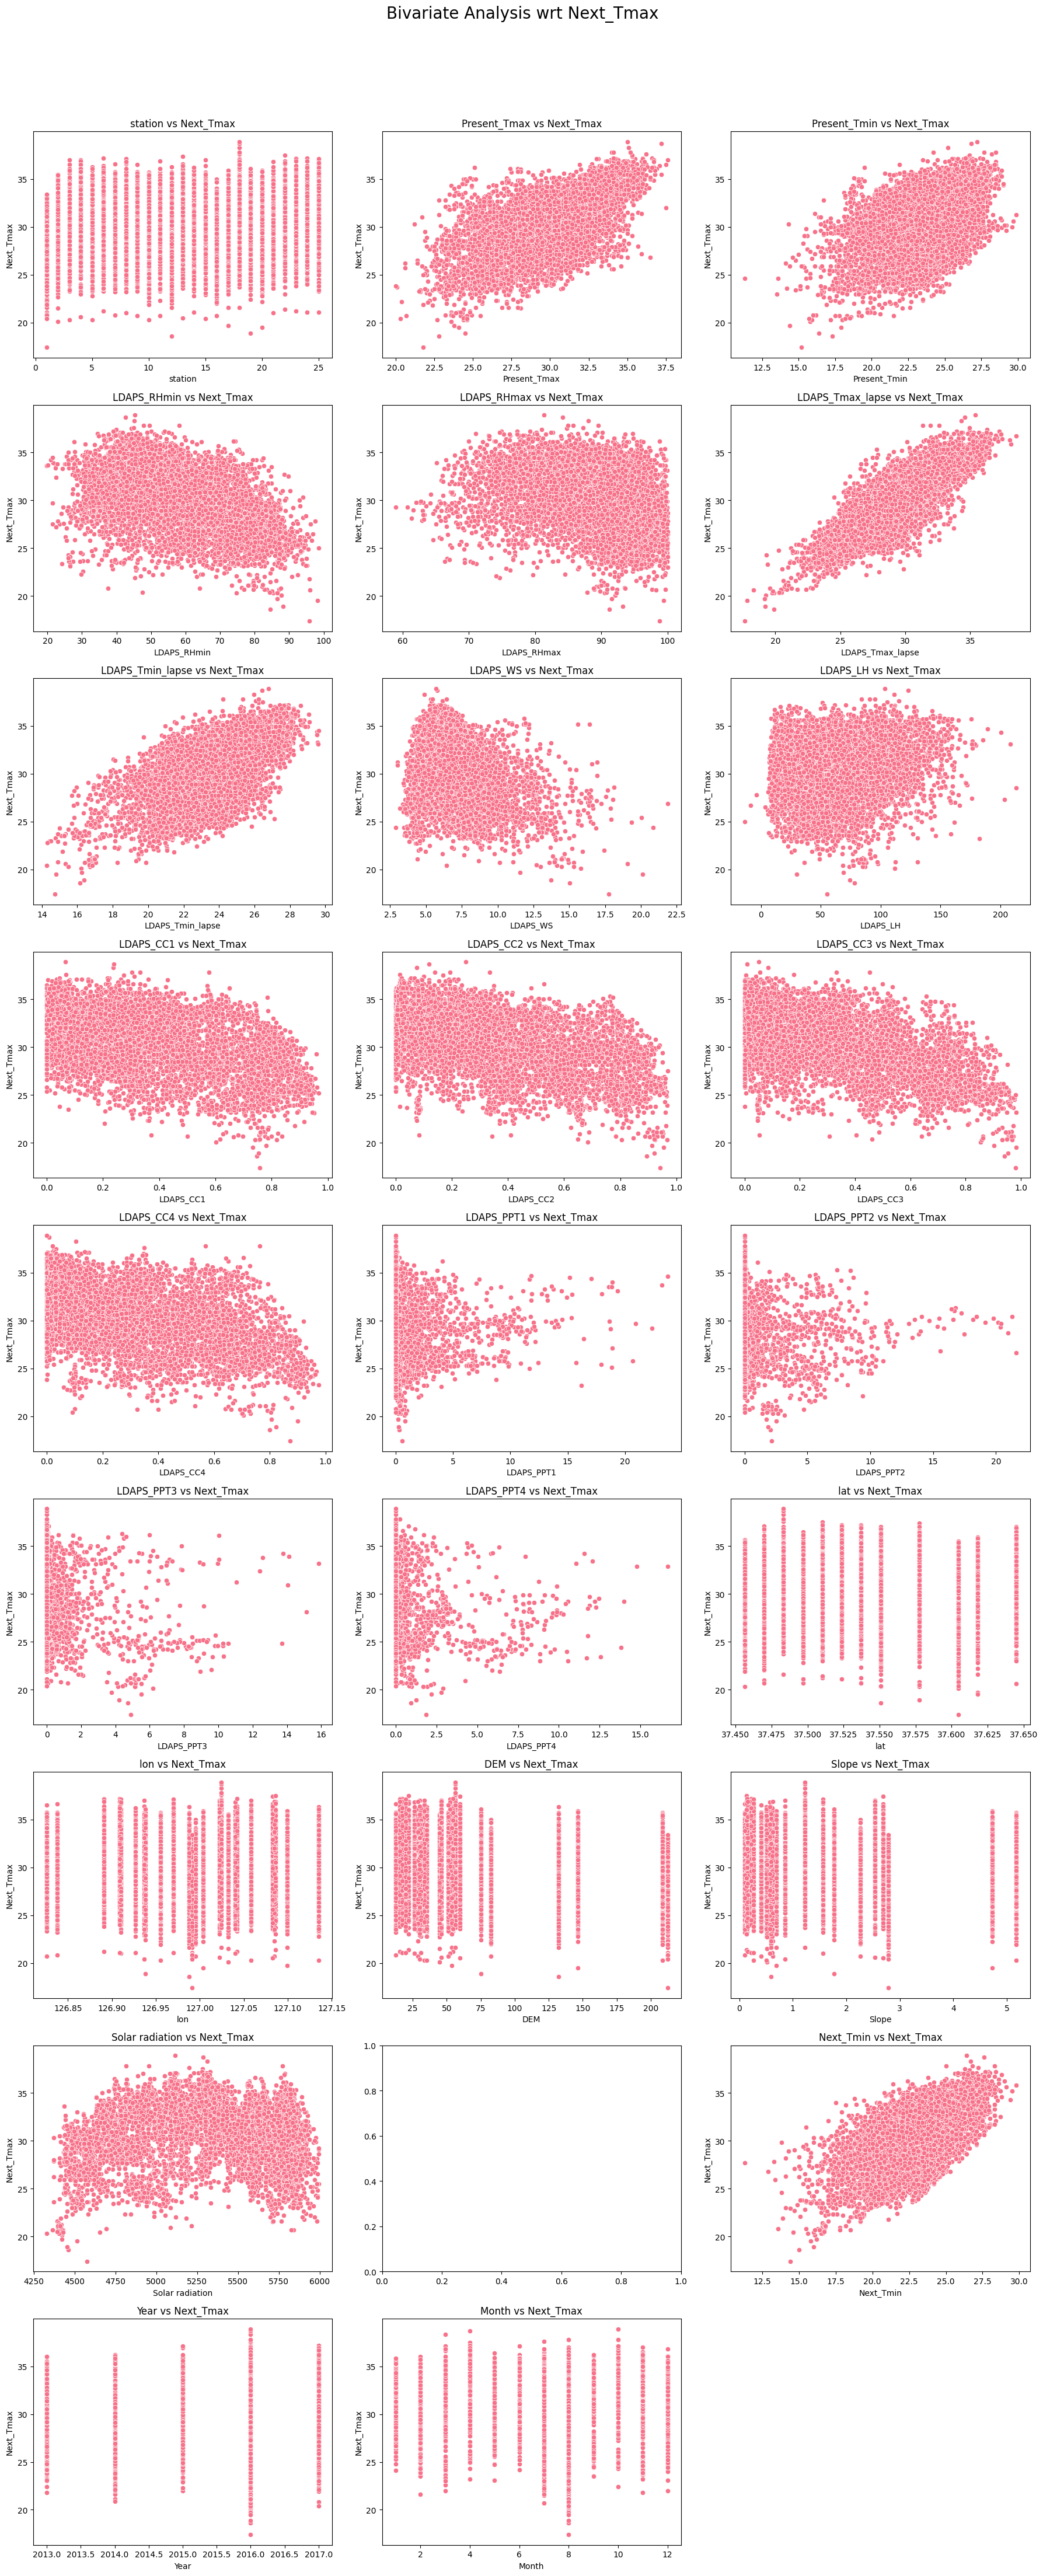

In [20]:
# Number of columns excluding 'Next_Tmax'
num_cols = len(df.columns) - 1

# Calculating the number of rows needed for the subplots
num_rows = (num_cols + 2) // 3

# Creating subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows * 5))
fig.suptitle('Bivariate Analysis wrt Next_Tmax', size=20)

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Looping through each column except 'Next_Tmax' and create scatter plots
colors = sns.color_palette("husl", num_cols) 
plot_idx = 0 
for idx, col in enumerate(df.columns):
    if col != 'Next_Tmax':
        sns.scatterplot(x=df[col], y=df['Next_Tmax'], ax=axes[idx], color=colors[plot_idx])
        axes[idx].set_title(f'{col} vs Next_Tmax')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Next_Tmax')

# Removing any empty subplots
for idx in range(num_cols, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Bivariate Analysis wrt Next_Tmin

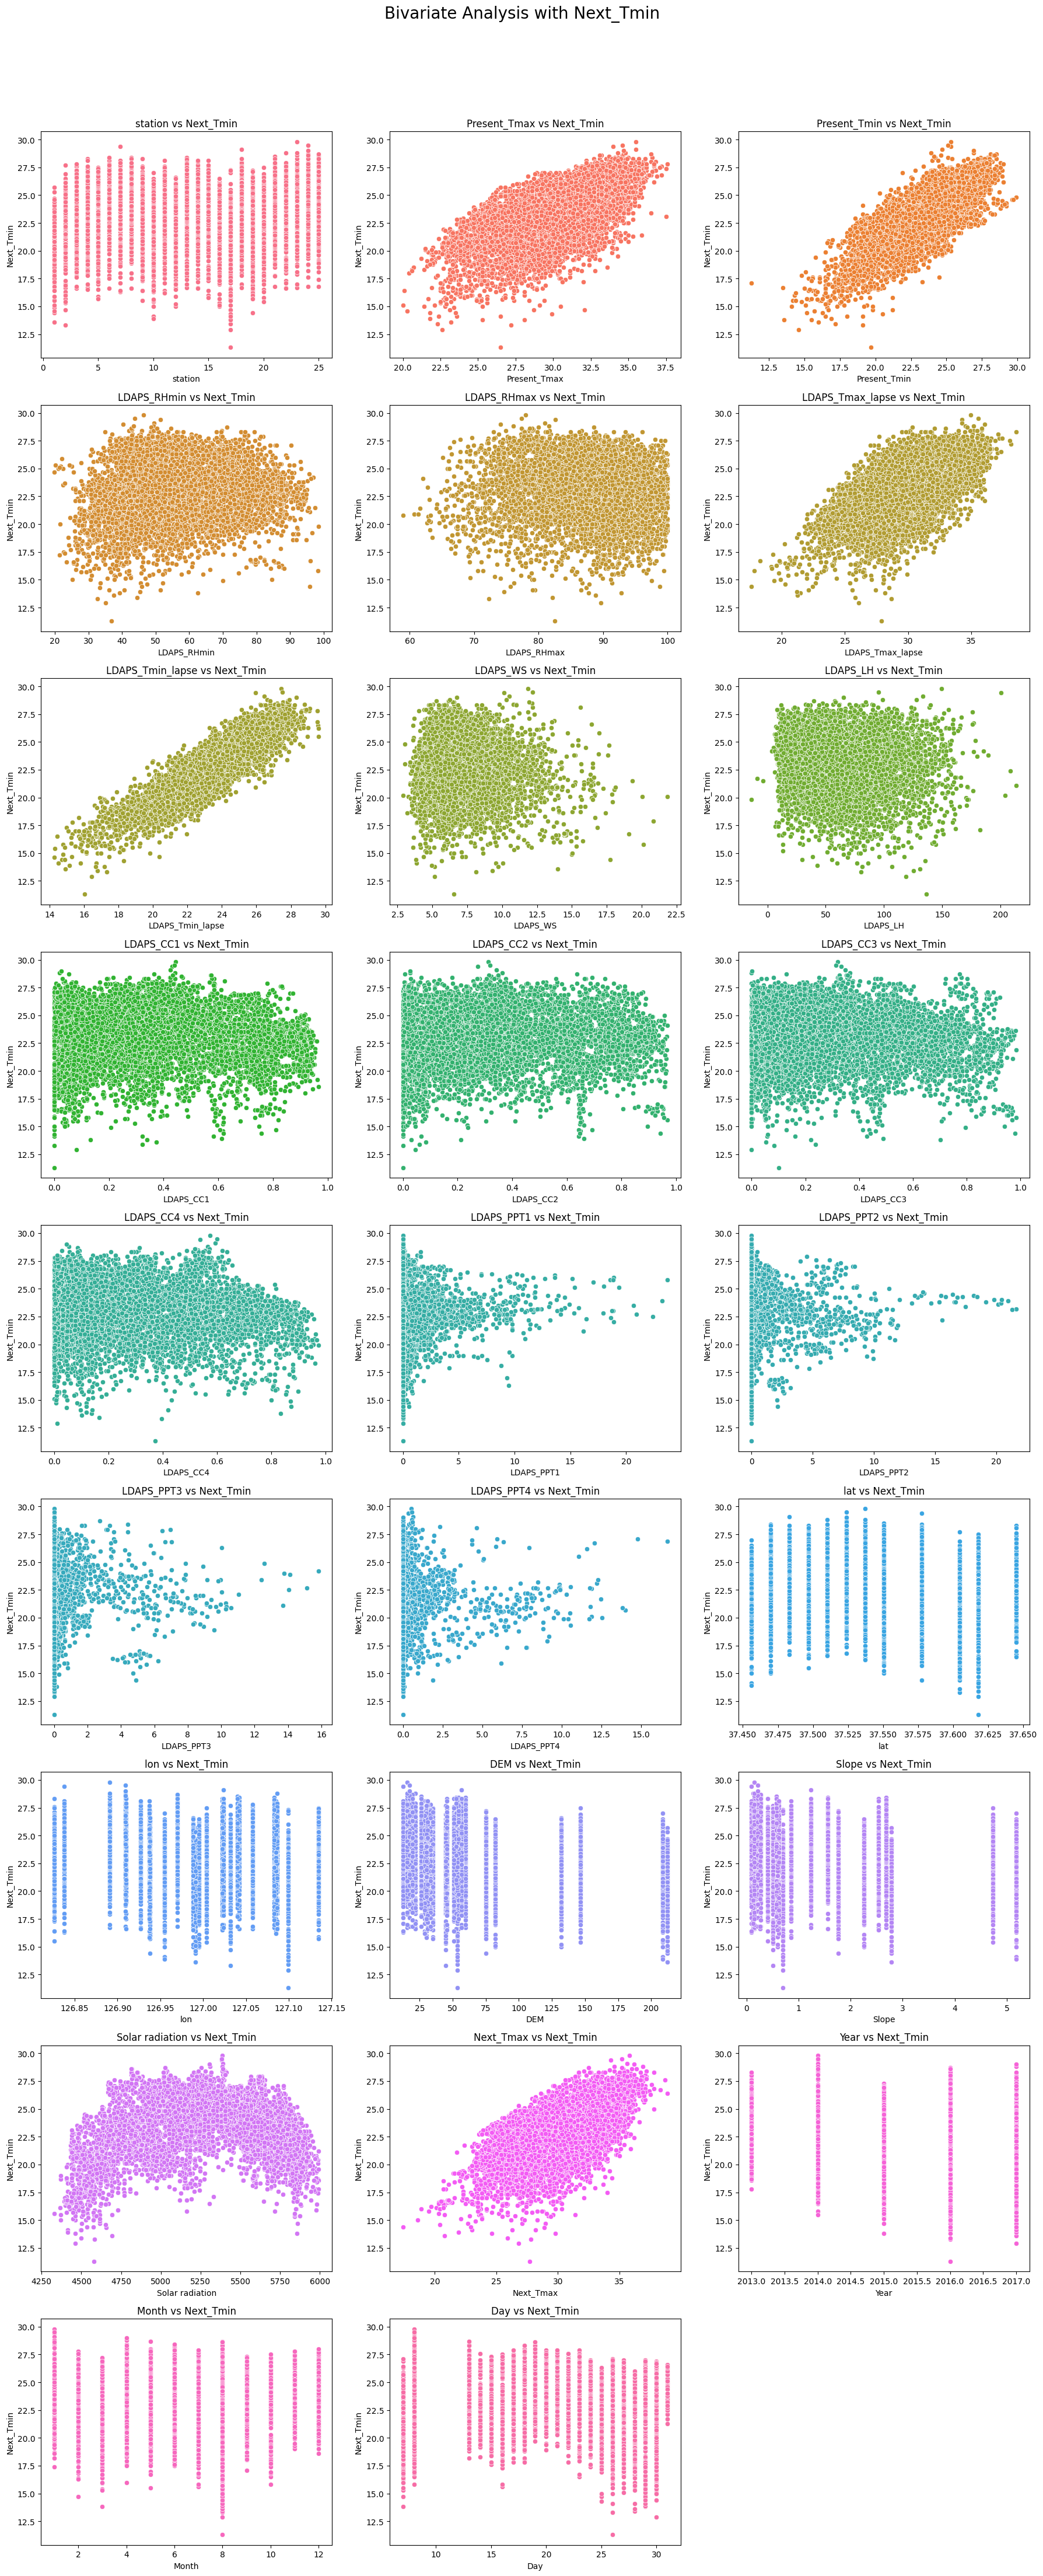

In [21]:
# Number of columns excluding 'Next_Tmin'
num_cols = len(df.columns) - 1

# Calculating the number of rows needed for the subplots
num_rows = (num_cols + 2) // 3

# Creating subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows * 5))
fig.suptitle('Bivariate Analysis with Next_Tmin', size=20)

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Looping through each column except 'Next_Tmin' and create scatter plots
colors = sns.color_palette("husl", num_cols)  
plot_idx = 0  
for col in df.columns:
    if col != 'Next_Tmin':
        sns.scatterplot(x=df[col], y=df['Next_Tmin'], ax=axes[plot_idx], color=colors[plot_idx])
        axes[plot_idx].set_title(f'{col} vs Next_Tmin')
        axes[plot_idx].set_xlabel(col)
        axes[plot_idx].set_ylabel('Next_Tmin')
        plot_idx += 1

# Removing any empty subplots
for idx in range(plot_idx, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Multivariate Analysis

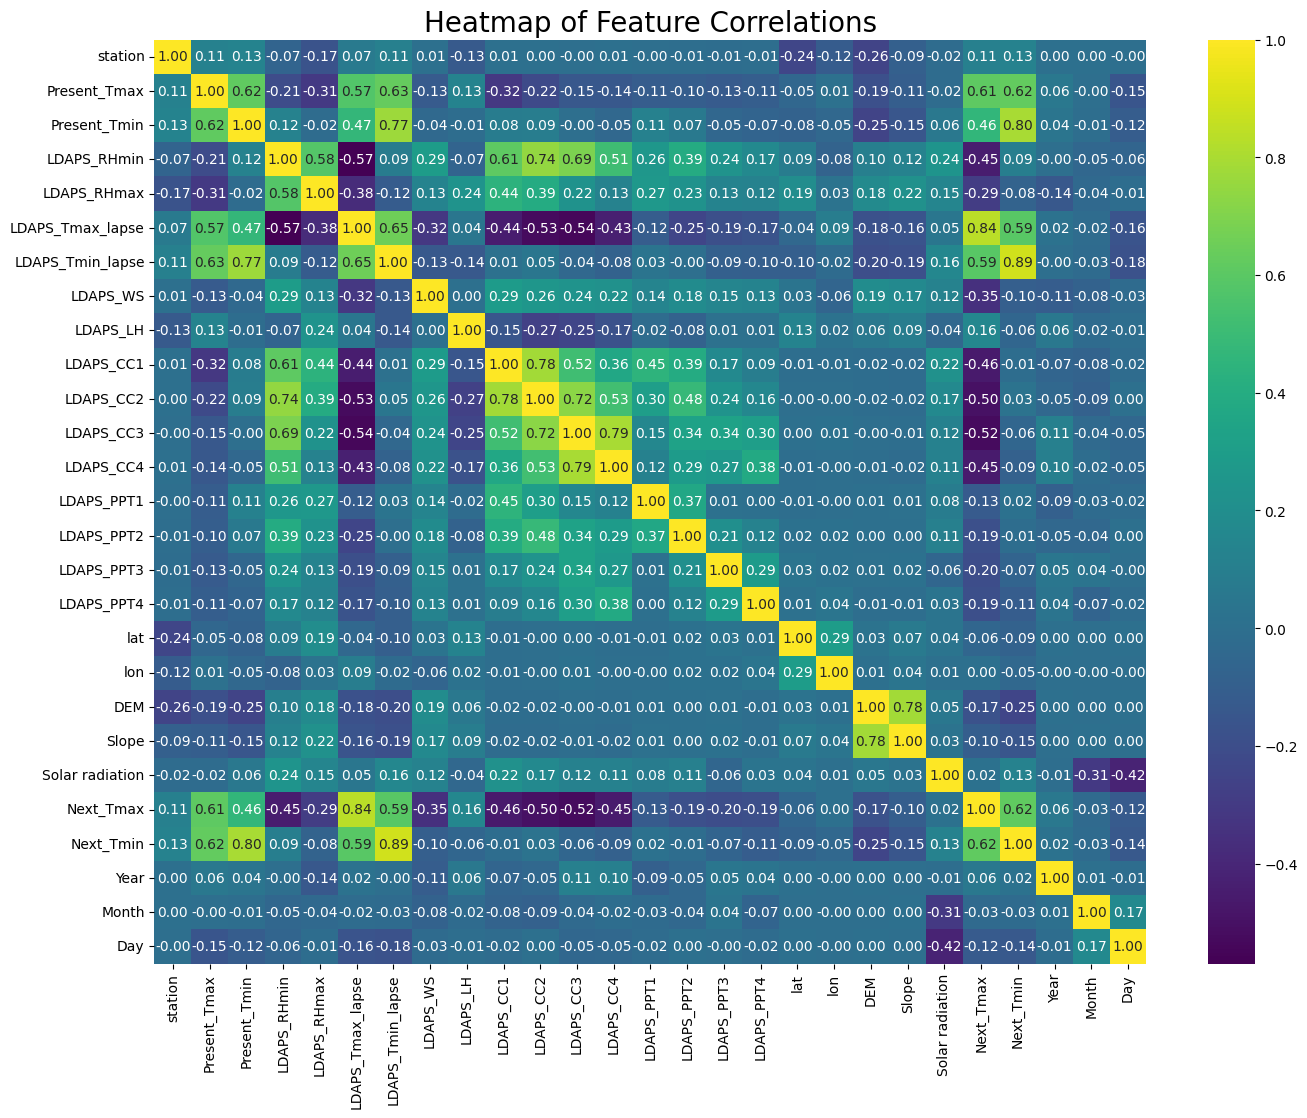

In [22]:
# Calculating the correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')

plt.title('Heatmap of Feature Correlations', size=20)
plt.show()

**Observations**
Next_Tmax relation with others
-Present_Tmax: Strong positive correlation (0.61). This indicates that today's maximum temperature is a good predictor of tomorrow's maximum temperature.
-Present_Tmin: Moderate positive correlation (0.46). This suggests that today's minimum temperature has a moderate influence on tomorrow's maximum temperature.
-LDAPS_RHmin: Moderate negative correlation (-0.45). Lower minimum relative humidity today seems to be associated with higher maximum temperature tomorrow.
-LDAPS_Tmax_lapse: Moderate negative correlation (-0.29). The lapse rate of today's maximum temperature negatively impacts tomorrow's maximum temperature.
-LDAPS_WS: Weak positive correlation (0.16). Wind speed has a slight positive influence on tomorrow's maximum temperature.
-LDAPS_PPT3: Moderate negative correlation (-0.19). Precipitation at the third period has a slight negative impact on tomorrow's maximum temperature.
-Solar radiation: Moderate positive correlation (0.20). Higher solar radiation today correlates with higher maximum temperatures tomorrow.
-Next_Tmin: Strong positive correlation (0.59). Tomorrow's minimum temperature strongly correlates with tomorrow's maximum temperature.

Next_Tmin relation with others 
-Present_Tmin: Strong positive correlation (0.80). This indicates that today's minimum temperature is a strong predictor of tomorrow's minimum temperature.
-Present_Tmax: Moderate positive correlation (0.62). This suggests that today's maximum temperature has a significant influence on tomorrow's minimum temperature.
-LDAPS_Tmax_lapse: Weak positive correlation (0.09). The lapse rate of today's maximum temperature slightly affects tomorrow's minimum temperature.
-LDAPS_Tmin_lapse: Moderate positive correlation (0.59). The lapse rate of today's minimum temperature has a considerable impact on tomorrow's minimum temperature.
-LDAPS_WS: Weak positive correlation (0.08). Wind speed has a slight positive influence on tomorrow's minimum temperature.
-LDAPS_CC3: Weak negative correlation (-0.09). Cloud cover at the third period has a slight negative impact on tomorrow's minimum temperature.
-Solar radiation: Weak negative correlation (-0.12). Higher solar radiation today has a slight negative correlation with tomorrow's minimum temperature.
-Next_Tmax: Strong positive correlation (0.59). Tomorrow's maximum temperature strongly correlates with tomorrow's minimum temperature.
Apart from this 
-Both "Next_Tmax" and "Next_Tmin" are strongly correlated with the present day's maximum and minimum temperatures, suggesting a strong temporal continuity in temperature patterns.
-Solar radiation and relative humidity play important roles in predicting next day's temperatures, although their influence is more on the maximum temperature.
-There are moderate correlations between lapse rates and next day's temperatures, indicating the importance of atmospheric conditions.
-Wind speed has a consistent but weak positive influence on both next day's maximum and minimum temperatures.

## Multicollinearity

In [24]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns=['Next_Tmax', 'Next_Tmin'])  
X = sm.add_constant(X)

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

             feature           VIF
0            station  5.163864e+00
1       Present_Tmax  2.894504e+02
2       Present_Tmin  3.014685e+02
3        LDAPS_RHmin  1.036367e+02
4        LDAPS_RHmax  3.494043e+02
5   LDAPS_Tmax_lapse  7.655352e+02
6   LDAPS_Tmin_lapse  7.469947e+02
7           LDAPS_WS  1.486288e+01
8           LDAPS_LH  6.859076e+00
9          LDAPS_CC1  1.043683e+01
10         LDAPS_CC2  1.542851e+01
11         LDAPS_CC3  1.375432e+01
12         LDAPS_CC4  7.165322e+00
13        LDAPS_PPT1  1.547385e+00
14        LDAPS_PPT2  1.572578e+00
15        LDAPS_PPT3  1.341890e+00
16        LDAPS_PPT4  1.341867e+00
17               lat  6.704259e+05
18               lon  1.649716e+06
19               DEM  7.332109e+00
20             Slope  5.497597e+00
21   Solar radiation  2.389267e+02
22              Year  1.273738e+06
23             Month  1.247821e+01
24               Day  6.414771e+00


From the above we can see that LDAPS_Tmax_lapse (7.683062) and LDAPS_Tmin_lapse (7.453026) have high VIF values, indicating potential multicollinearity concerns.

## Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['Next_Tmax', 'Next_Tmin'])  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## PCA

In [26]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determining the number of components to keep 
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
n_components = next(i for i, total_variance in enumerate(cumulative_variance) if total_variance >= 0.95) + 1

# Applying PCA with the chosen number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Creating a DataFrame with the principal components
columns = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(X_pca, columns=columns)

print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.005923  2.590567 -2.556299 -0.202503 -0.104829  0.246703 -0.852004   
1 -1.033815  0.529892 -0.656160 -0.654866  1.292332 -1.090801 -0.816216   
2 -1.317226 -0.207603  0.014972 -0.502955  0.767939 -0.960925 -1.530594   
3 -0.655061  0.794666 -1.773896 -0.643281  1.613424 -0.425591 -0.486068   
4 -1.019917  0.713847 -0.681934 -0.511747  1.724774 -1.127135 -0.015470   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.433212 -1.014931  0.109055  1.563287  0.186466  0.292957  0.230881   
1  0.477779 -1.208364  0.017968  1.524815  0.106715  0.276490  0.026171   
2  1.015612 -1.051607 -0.020689  1.681621 -0.072876  0.325962  0.186644   
3  0.299117 -1.354583 -0.439971  1.043452  0.654412  0.312989  0.157146   
4  0.518546 -0.688355 -0.397775  1.033939  0.708431 -0.321225 -1.057230   

       PC15      PC16      PC17      PC18      PC19  
0  0.750633 -0.709368  1.659650  0.236720  0

## Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
y_tmax=df['Next_Tmax']
y_tmin=df['Next_Tmin']

# Splitting the data into training and test sets for both Next_Tmax and Next_Tmin
X_train_tmax, X_test_tmax, y_tmax_train, y_tmax_test = train_test_split(X_pca, y_tmax, test_size=0.2, random_state=42)
X_train_tmin, X_test_tmin, y_tmin_train, y_tmin_test = train_test_split(X_pca, y_tmin, test_size=0.2, random_state=42)

In [30]:
print("Shape of X_train_tmax:", X_train_tmax.shape)
print("Shape of X_test_tmax:", X_test_tmax.shape)
print("Shape of y_tmax_train:", y_tmax_train.shape)
print("Shape of y_tmax_test:", y_tmax_test.shape)

Shape of X_train_tmax: (6070, 19)
Shape of X_test_tmax: (1518, 19)
Shape of y_tmax_train: (6070,)
Shape of y_tmax_test: (1518,)


In [31]:
print("Shape of X_train_tmin:", X_train_tmin.shape)
print("Shape of X_test_tmin:", X_test_tmin.shape)
print("Shape of y_tmin_train:", y_tmin_train.shape)
print("Shape of y_tmin_test:", y_tmin_test.shape)

Shape of X_train_tmin: (6070, 19)
Shape of X_test_tmin: (1518, 19)
Shape of y_tmin_train: (6070,)
Shape of y_tmin_test: (1518,)


## Model Training and Evaluation

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [33]:
# Defining Functions for Model Training and Evaluation

def train_predict_evaluate(model, X_train, X_test, y_train, y_test):
    # Training the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluating metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return y_pred, mae, mse, r2

### Model Training and evaluation for Next_Tmax

In [35]:
# Initializing models
models_tmax = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Training and evaluating models for Next_Tmax
results_tmax = {}
for name, model in models_tmax.items():
    print(f"Training {name}...")
    y_pred_tmax, mae_tmax, mse_tmax, r2_tmax = train_predict_evaluate(model, X_train_tmax, X_test_tmax, y_tmax_train, y_tmax_test)
    results_tmax[name] = {'MAE': mae_tmax, 'MSE': mse_tmax, 'R2': r2_tmax}
    print(f"{name} - MAE: {mae_tmax:.2f}, MSE: {mse_tmax:.2f}, R2: {r2_tmax:.2f}")

# Displaying results for Next_Tmax
results_df_tmax = pd.DataFrame(results_tmax)
print("\nResults for Next_Tmax:")
print(results_df_tmax)

Training Linear Regression...
Linear Regression - MAE: 1.17, MSE: 2.38, R2: 0.75
Training Decision Tree...
Decision Tree - MAE: 1.30, MSE: 3.26, R2: 0.65
Training Random Forest...
Random Forest - MAE: 0.89, MSE: 1.43, R2: 0.85

Results for Next_Tmax:
     Linear Regression  Decision Tree  Random Forest
MAE           1.170069       1.298551       0.889467
MSE           2.376725       3.259960       1.428621
R2            0.747626       0.653839       0.848301


#### from above all Random Forest is giving highest accuracy followed by Linear Regression for Next_Tmax.

### Model Training and evaluation for Next_Tmin

In [36]:
# Initializing models
models_tmin = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Training and evaluating models for Next_Tmin
results_tmin = {}
for name, model in models_tmin.items():
    print(f"Training {name}...")
    y_pred_tmin, mae_tmin, mse_tmin, r2_tmin = train_predict_evaluate(model, X_train_tmin, X_test_tmin, y_tmin_train, y_tmin_test)
    results_tmin[name] = {'MAE': mae_tmin, 'MSE': mse_tmin, 'R2': r2_tmin}
    print(f"{name} - MAE: {mae_tmin:.2f}, MSE: {mse_tmin:.2f}, R2: {r2_tmin:.2f}")

# Displaying results for Next_Tmin
results_df_tmin = pd.DataFrame(results_tmin)
print("\nResults for Next_Tmin:")
print(results_df_tmin)

Training Linear Regression...
Linear Regression - MAE: 0.84, MSE: 1.15, R2: 0.81
Training Decision Tree...
Decision Tree - MAE: 1.02, MSE: 1.86, R2: 0.70
Training Random Forest...
Random Forest - MAE: 0.70, MSE: 0.83, R2: 0.86

Results for Next_Tmin:
     Linear Regression  Decision Tree  Random Forest
MAE           0.839504       1.022332       0.703920
MSE           1.151209       1.862062       0.833672
R2            0.812604       0.696890       0.864293


#### from above all Random Forest is giving highest accuracy followed by Linear Regression for Next_Tmin.

## Saving The Model

In [37]:
import joblib

In [38]:
# Saving the RandomForestRegressor model for Next_Tmax
rf_tmax = models_tmax['Random Forest']
joblib.dump(rf_tmax, 'random_forest_tmax_model.pkl')

['random_forest_tmax_model.pkl']

In [39]:
# Saving the RandomForestRegressor model for Next_Tmin
rf_tmin = models_tmin['Random Forest']
joblib.dump(rf_tmin, 'random_forest_tmin_model.pkl')

['random_forest_tmin_model.pkl']

## Documentation

I started this project by importing some important libraries followed by loading the data directly from raw link in dataframe df after I explored the df for missing values,dtype etc.
After that I changed datatype od date and extracted important features from that and also dropped the missing values followed by univariate, bivariate, multivariate visulizations then i checked for correlation and multicollienarity in the dataset followed by Feature scaling and principle component analysis.
Then splitted the data into training and testing set after that trained my model with different algorithms out of which random forest regressor perform the best and i saved that.

Also, Random Forest Regressors are commonly used in weather forecasting and other domains where prediction accuracy, interpretability, and robustness against overfitting are important considerations.